In [2]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

IPython: 6.5.0
numpy: 1.15.4
scipy: 1.1.0
matplotlib: 2.2.2
scikit-learn: 0.20.0


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')

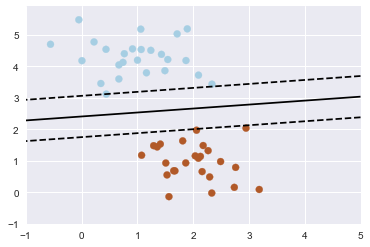

In [2]:
# Import the example plot from the figures directory
from fig_code import plot_sgd_separator
plot_sgd_separator()

### LinearRegression

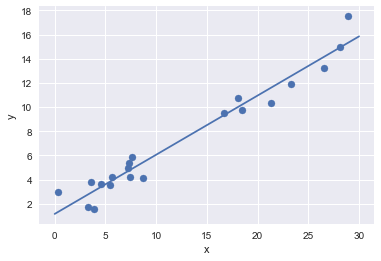

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


a = 0.5
b = 1.0

# x from 0 to 30
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

# create a linear regression classifier
clf = LinearRegression()
clf.fit(x[:, None], y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.show()

In [9]:
x =  np.random.random(20)
x

array([0.50229884, 0.62799005, 0.21313368, 0.44803231, 0.2622444 ,
       0.76303206, 0.42417954, 0.99409476, 0.077287  , 0.4146093 ,
       0.85875671, 0.63534119, 0.7493473 , 0.21568421, 0.68491677,
       0.99081815, 0.56638164, 0.31830702, 0.15926813, 0.7001909 ])

### Supervised Learning - Classification - Iris Recognition

- given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like (So-called recommender systems: a famous example is the Netflix Prize).

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['feature_names', 'filename', 'data', 'target', 'target_names', 'DESCR'])

In [11]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


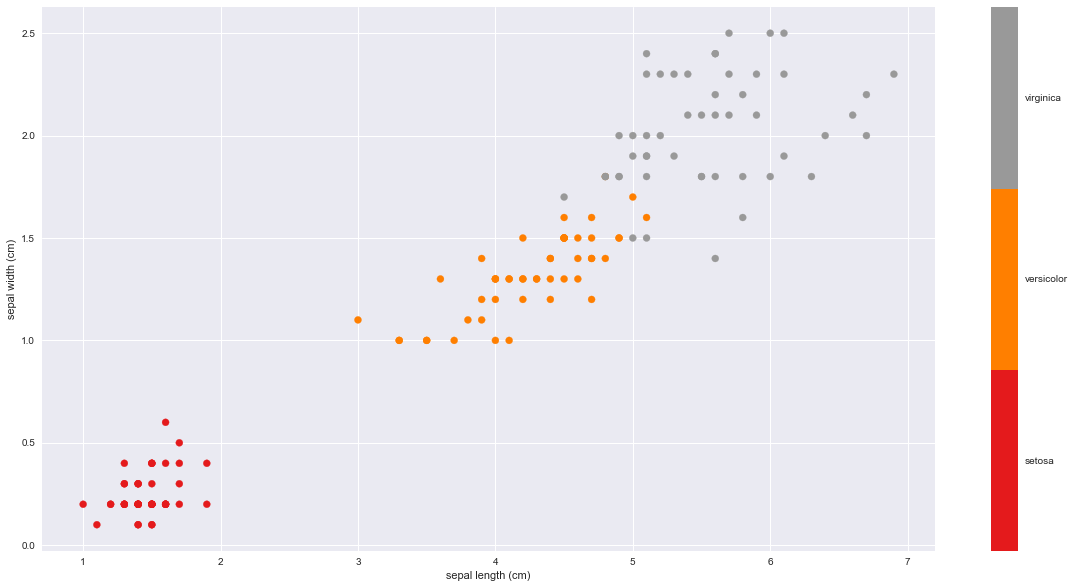

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
petal_length = 2
petal_width = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, petal_length], iris.data[:, petal_width],
            c=iris.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

In [34]:
iris.data[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

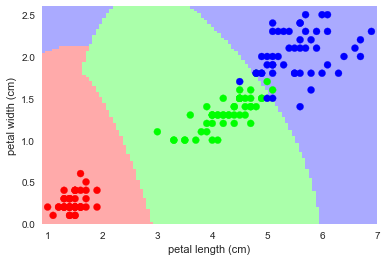

In [40]:
from sklearn import neighbors, datasets, linear_model
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

if True:
    iris = datasets.load_iris()
    X = iris.data[:, 2:4]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
    y = iris.target

    knn = SVC(gamma='auto')#neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('petal length (cm)')
    pl.ylabel('petal width (cm)')
    pl.axis('tight')

### Supervised Learning - Regression

C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


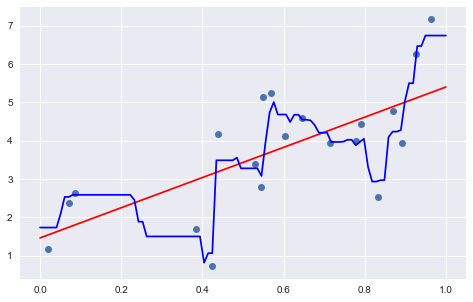

In [102]:
# Create some simple data
import numpy as np
from sklearn.ensemble import RandomForestRegressor

np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.figure(figsize=(8,5))
plt.plot(X.squeeze(), y, 'o');

###########################################################
##  LinearRegression
###########################################################
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X_fit.squeeze(), y_fit,'r');

###########################################################
##  RandomForestRegressor
###########################################################
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X_fit.squeeze(), y_fit,'b');

plt.show()

## Unsupervised Learning: Dimensionality Reduction and Clustering

- given detailed observations of distant galaxies, determine which features or combinations of features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music), separate the two (this is called the blind source separation problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

### Dimensionality Reduction: PCA

In [100]:
x, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(x)
x_reduced = pca.transform(x)
print("Reduced dataset shape:", x_reduced.shape)

Reduced dataset shape: (150, 2)


Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


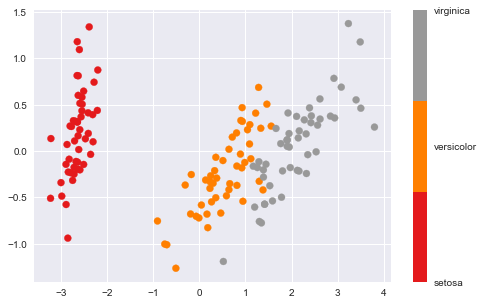

In [101]:
import pylab as plt
plt.figure(figsize=(8,5))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y,
           cmap = plt.cm.get_cmap('Set1', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))

(-3.323803743865654,
 3.895645422072884,
 -1.3659711905263938,
 1.4741650867930476)

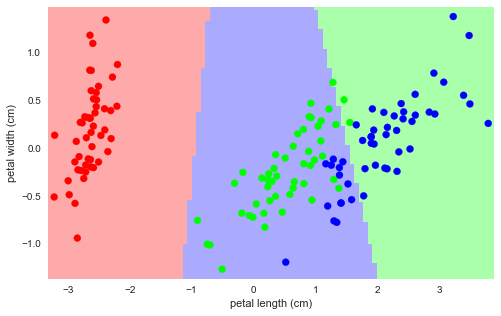

In [98]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(x_reduced)
y_pred = k_means.predict(x_reduced)

x_min, x_max = x_reduced[:, 0].min() - .1, x_reduced[:, 0].max() + .1
y_min, y_max = x_reduced[:, 1].min() - .1, x_reduced[:, 1].max() + .1
    
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.axis('tight')

### Model Validation

In [66]:
##############################################################
from sklearn.neighbors import KNeighborsClassifier

X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

###############################################################
## A more useful way to look at the results is to view the confusion matrix, 
## or the matrix showing the frequency of inputs and outputs
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, y_pred))

False
[[50  0  0]
 [ 0 50  0]
 [ 0  3 47]]


In [62]:
## This is why it's extremely important to use a train/test split 
## when evaluating your models.
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[12  0  0]
 [ 0  6  0]
 [ 0  2 18]]


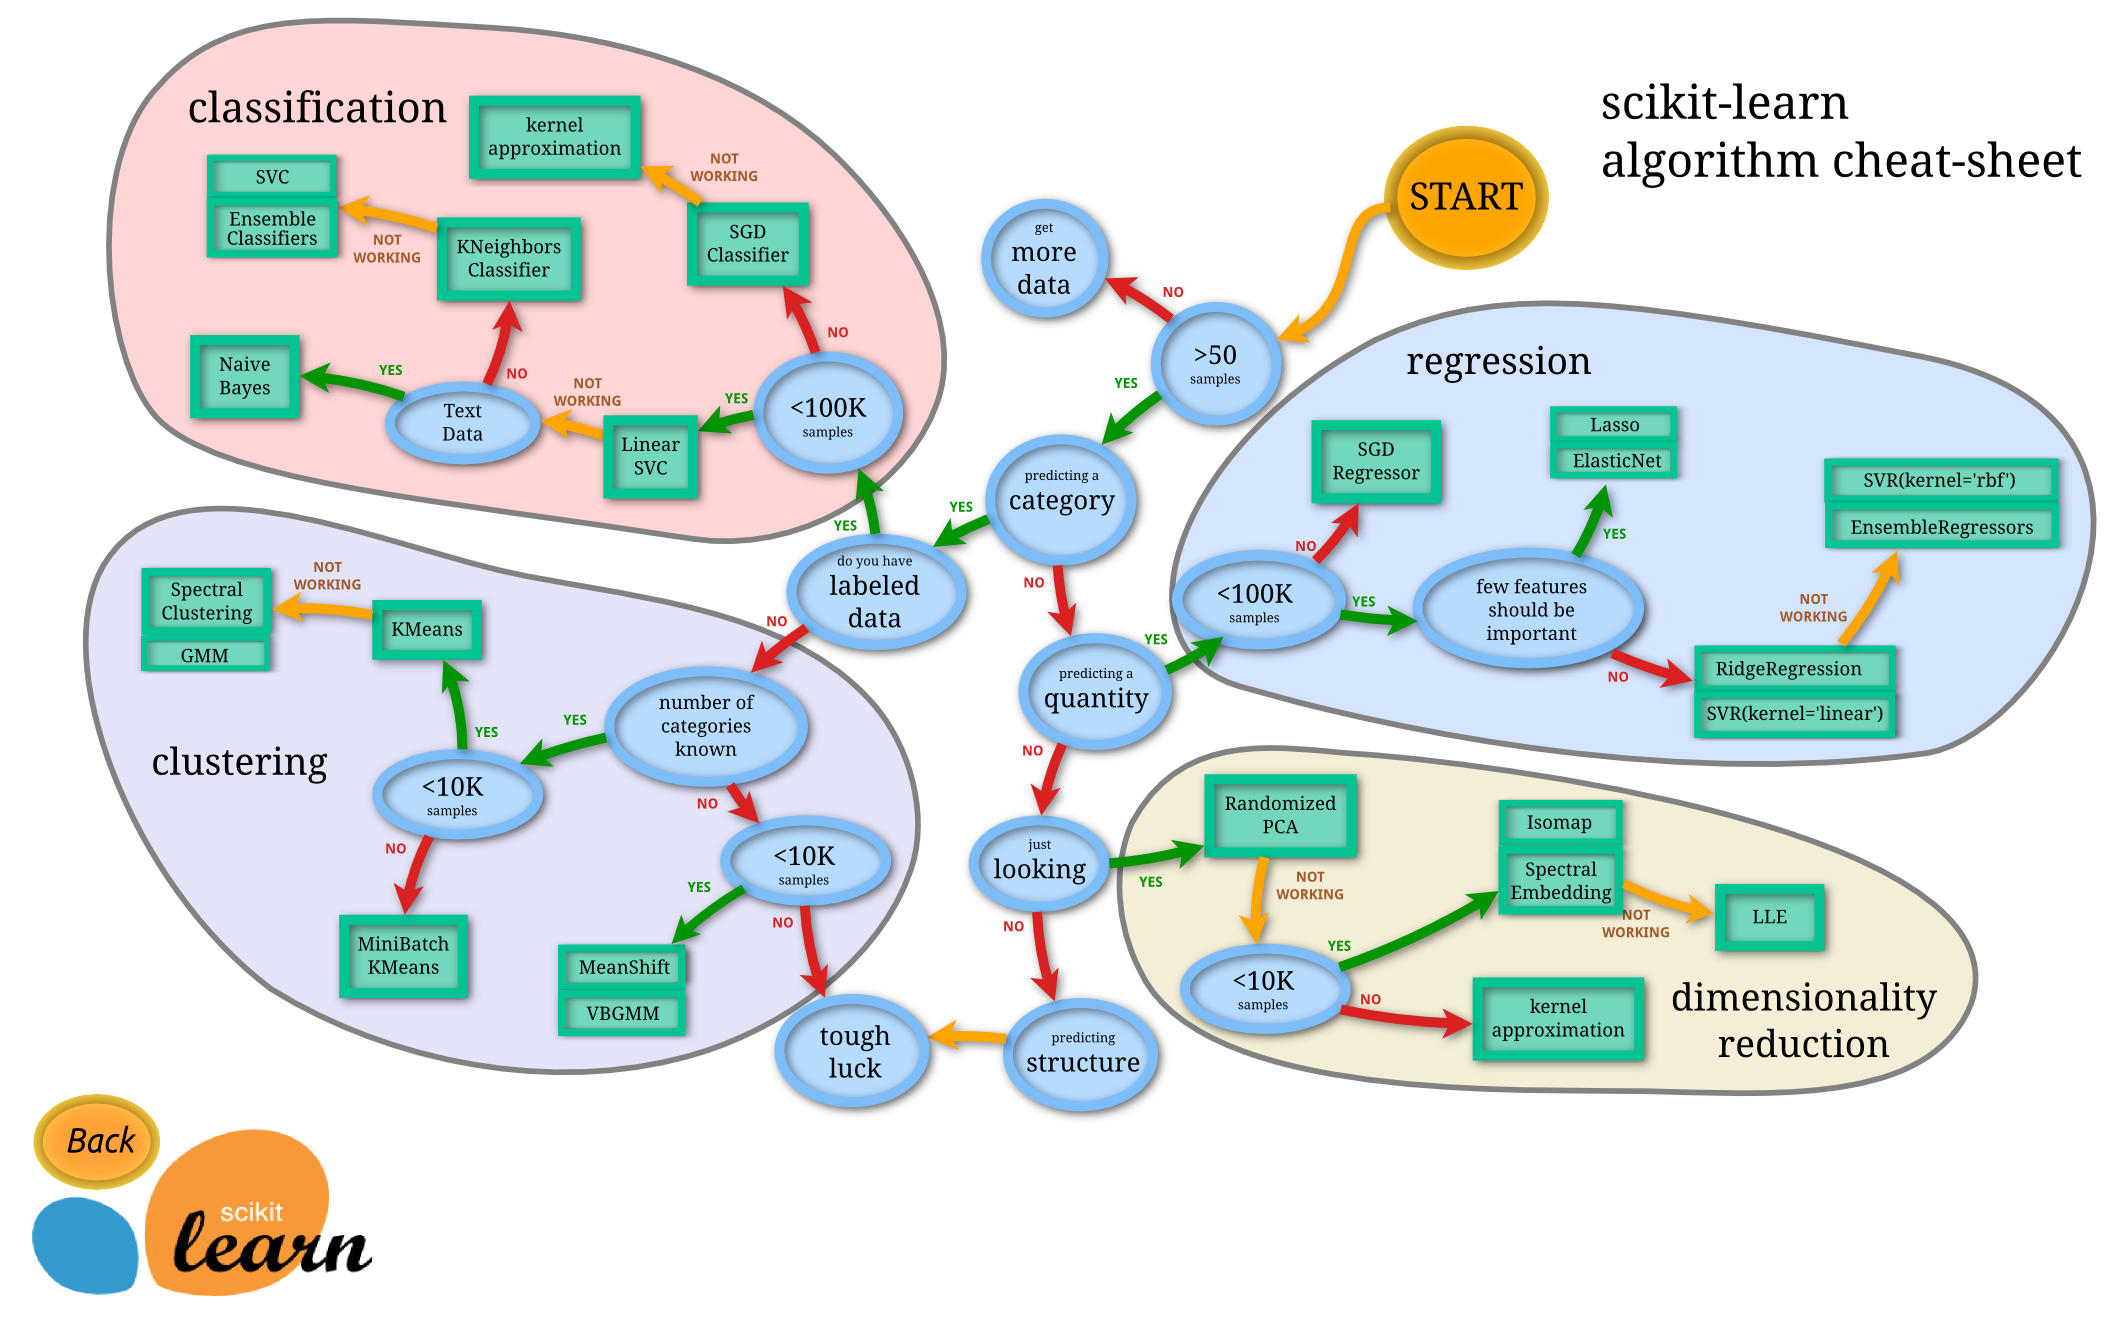

In [74]:
from IPython.display import Image
Image("https://scikit-learn.org/stable/_static/ml_map.png")

## Quick Application: Optical Character Recognition

In [75]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

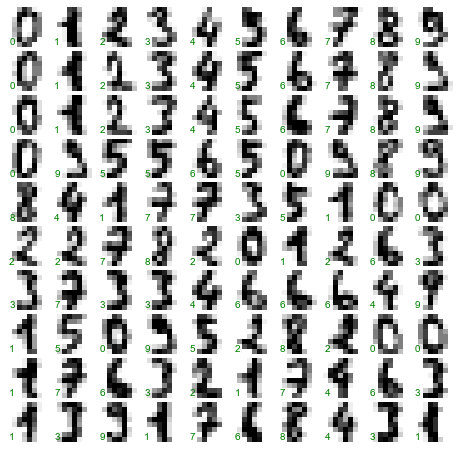

In [77]:
## Plot some Data
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [79]:
# The images themselves
print(digits.images.shape)
# The data for use in our algorithms
print(digits.data.shape)
# The target label
print(digits.target)

(1797, 8, 8)
(1797, 64)
[0 1 2 ... 8 9 8]


- ### Unsupervised Learning: Dimensionality Reduction

(1797, 2)


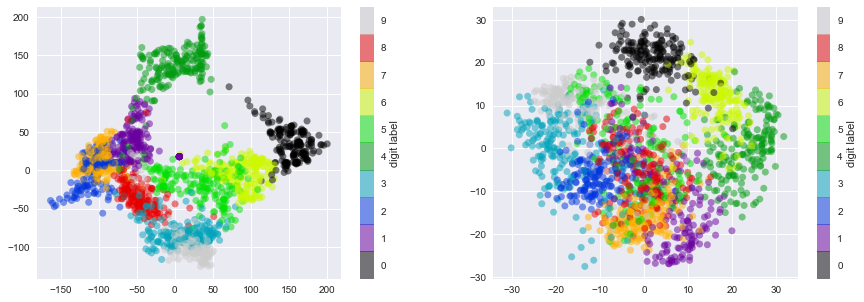

In [86]:
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)
data_projected_pca = pca.fit_transform(digits.data)
print(data_projected.shape)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

plt.subplot(122)
plt.scatter(data_projected_pca[:, 0], data_projected_pca[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

- ### Classification on Digits

In [87]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=2)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


In [89]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9466666666666667
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


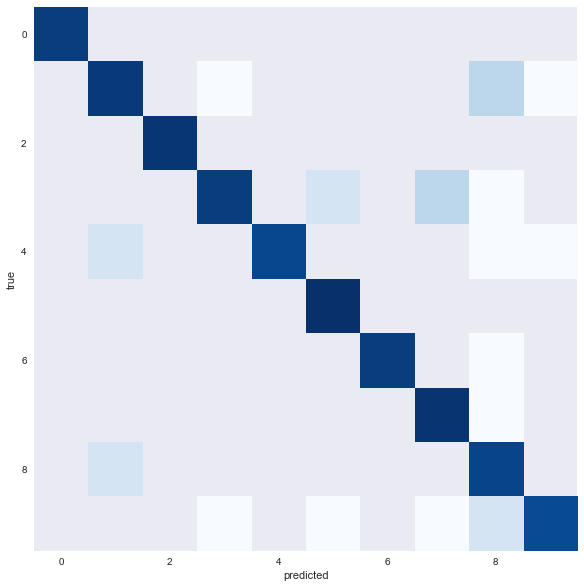

In [94]:
plt.figure(figsize = (10,10))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

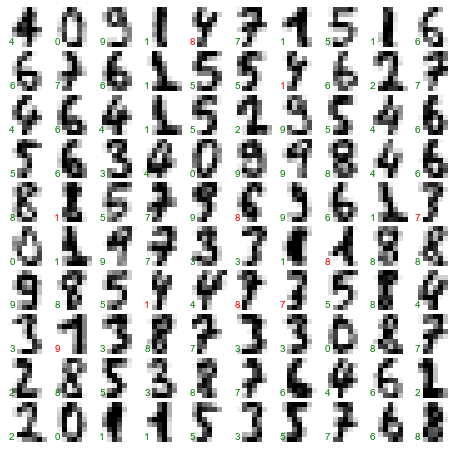

In [95]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])